# Домашнее задание №9. Регуляризация

## Задание 1
Для выбранного в прошлом задании датасета и выбранных в нем признаков постройте множественную линейную регрессию с регуляризацией Ridge (самостоятельно написанную или, например, <code>sklearn.linear_model.Ridge</code>).

Подбор параметров осуществляйте самостоятельно, либо используя встроенные средства, например, <code>sklearn.model_selection.GridSearchCV</code>.

Для оценки результатов выберите какую-нибудь метрику, например, MSE, и отслеживайте как она меняется для модели без регуляризации и с ней.

In [200]:
# Напишите свой код в данной ячейке

In [201]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Напишите свой код в данной ячейке
df = pd.read_csv("youtube_channel_real_performance_analytics.csv", encoding_errors="replace").dropna()
df

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


In [202]:
# Напишите свой код в данной ячейке
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

X, y = df[['Monetized Playbacks (Estimate)', 'Average View Percentage (%)', 'Views', 'Days Since Publish', 'Subscribers']], df['Estimated Revenue (USD)']
# X, y = df.drop(['Estimated Revenue (USD)', 'ID', 'Video Publish Time', 'Day of Week'], axis=1), df['Estimated Revenue (USD)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)  

LinearRegression()

In [203]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.8047491656964623

In [204]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import Ridge

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# обучение модели 
print('Лучшее значение alpha:', ridge.fit(X,y).best_params_)


Лучшее значение alpha: {'alpha': 100}


0.9204401452846093


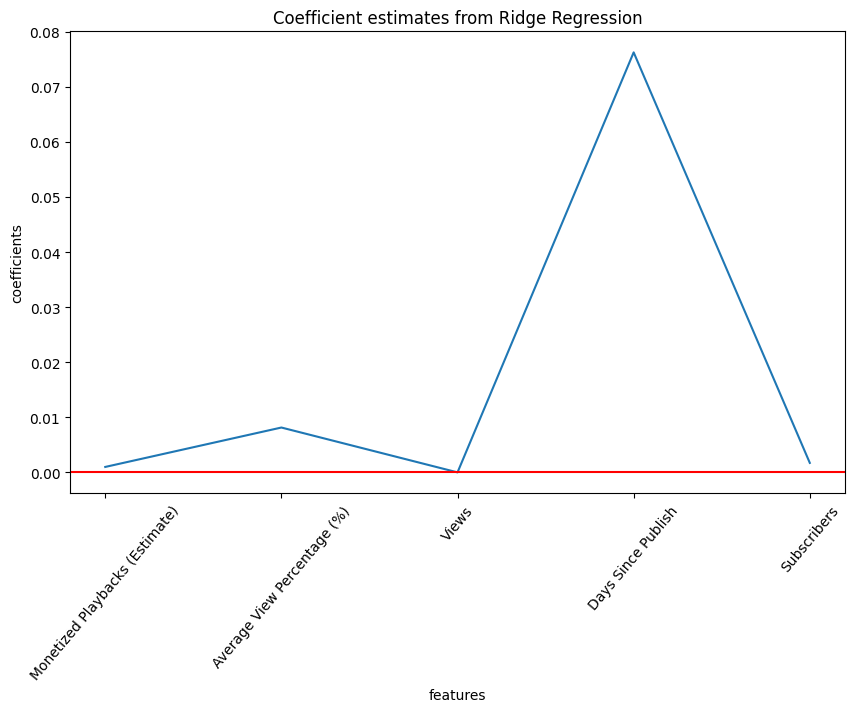

In [205]:
# Создание объекта, содержащего наилучшую модель
best_ridge_model = Ridge(alpha=100)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(X, y).coef_

y_pred = best_ridge_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

feature_names = X.columns
# Построение графика c коэффициентами для всех десяти признаков
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

## Задание 2
Тоже самое, но теперь используя регуляризацию Lasso.

In [206]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import Lasso

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# обучение модели 
print('Лучшее значение alpha:', ridge.fit(X,y).best_params_)

Лучшее значение alpha: {'alpha': 5}


0.9242267385089604


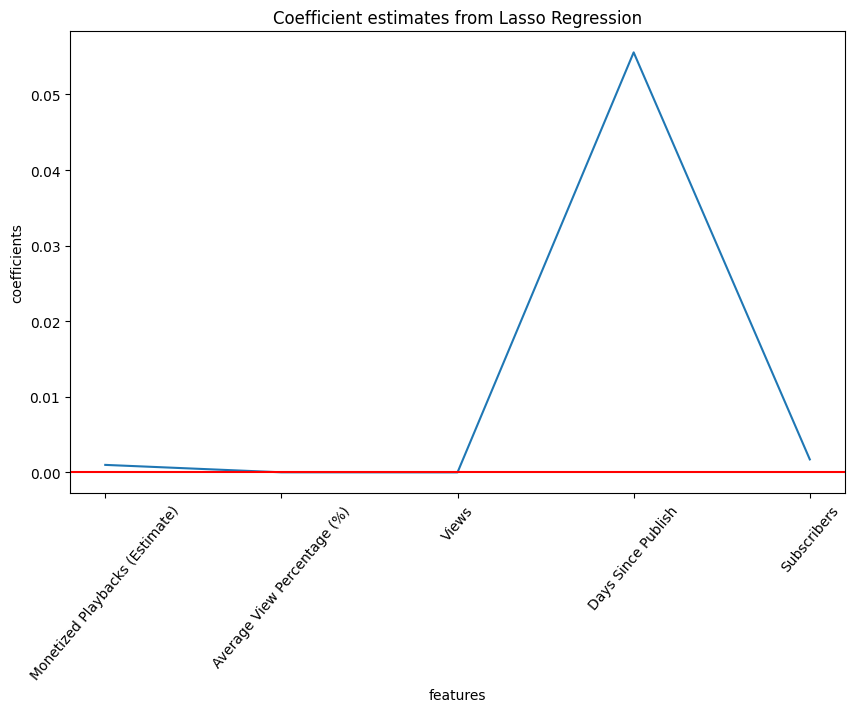

In [207]:
# Создание объекта, содержащего наилучшую модель
best_ridge_model = Lasso(alpha=5)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(X, y).coef_

y_pred = best_ridge_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

feature_names = X.columns
# Построение графика c коэффициентами для всех десяти признаков
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

## Задание 3

Тоже самое, но теперь используя регуляризацию Elastic Net.

In [208]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import ElasticNet

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(ElasticNet(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# обучение модели 
print('Лучшее значение alpha:', ridge.fit(X,y).best_params_)

Лучшее значение alpha: {'alpha': 10}


0.9242597900167047


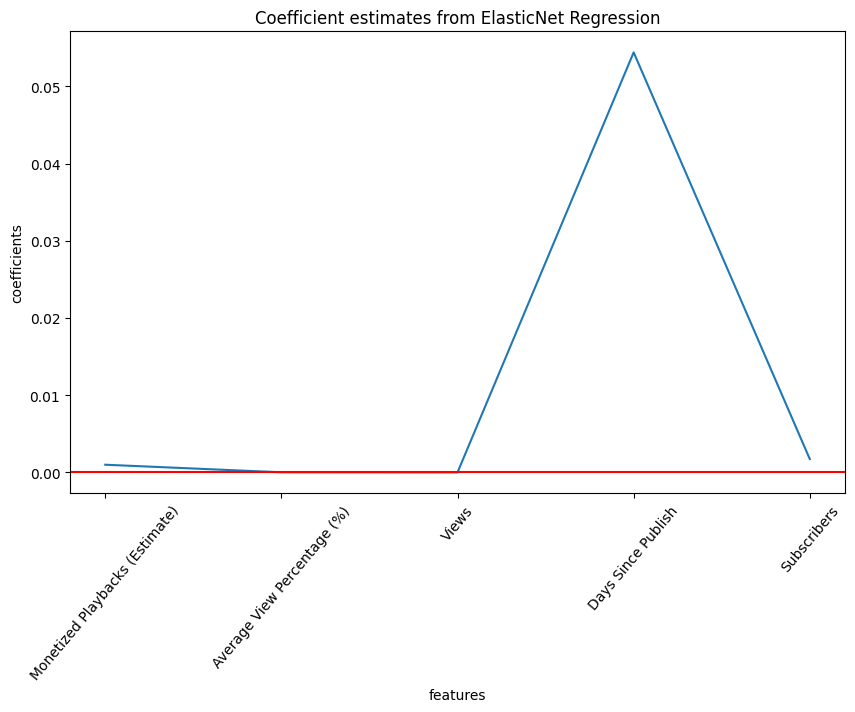

In [209]:
# Создание объекта, содержащего наилучшую модель
best_ridge_model = ElasticNet(alpha=10)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(X, y).coef_

y_pred = best_ridge_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

feature_names = X.columns
# Построение графика c коэффициентами для всех десяти признаков
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from ElasticNet Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()